In [1]:
import dtmvisual as dt
from dtmvisual import gensim_corpus
from dtmvisual import VisualizeTopics

import json
from pathlib import Path
import pandas as pd
import os

from gensim import corpora, utils
from gensim.models.wrappers.dtmmodel import DtmModel
from gensim.models import CoherenceModel

In [2]:
from dtmvisual import DTMmodel as mod

In [3]:
data_file_name_with_path = 'data_files.json'

In [4]:
with open(file=data_file_name_with_path, mode='r') as file:
    data = json.load(fp=file)

In [5]:
legal_docs_df = pd.read_json('data_files.json')

In [19]:
legal_docs_df['Effective_date'] = legal_docs_df['Effective_date'].apply(lambda x: pd.Timestamp(x))

In [11]:
legal_docs_df['Year'] = legal_docs_df['Effective_date'].dt.year

In [36]:
time_slices.values

array([ 1,  1,  2,  2,  2,  1,  1,  1,  5,  7,  2,  9,  6,  4,  6,  6,  4,
        4,  7,  3,  3,  1,  4,  4,  2,  1,  7,  3, 12,  5, 10,  9, 16, 22,
        9, 16, 31,  9,  5,  3,  8,  7,  4, 14,  7, 11,  9, 18, 12, 17, 12,
        8,  9, 13, 15, 28, 20], dtype=int64)

In [64]:
path = "D:\BDBA 4th Semester\DTMModel\dtmvisual-master\dtm-win64.exe"

In [77]:
for n in range(len(sentences)):
    if len(sentences[n]) == 0:
        print(True, n)
        print(sentences[n])

True 29
[]
True 80
[]
True 233
[]
True 234
[]
True 235
[]
True 286
[]


In [94]:
#legal_docs_df.drop([29,80,233,234,235,286], axis=0, inplace=True)
#legal_docs_df['clean_Document_Content'][29]
#legal_docs_df.reset_index(drop=True, inplace=True)

In [95]:
sentences = gensim_corpus.docs_to_list(legal_docs_df['clean_Document_Content'])
corpus = gensim_corpus.corpus_dtm(sentences)

The collection of documents contains 452 documents
DTMcorpus constructed


In [112]:
time_slices = legal_docs_df.groupby('Year').size()
time_slices

Year
1953     1
1958     1
1960     2
1961     1
1963     1
1964     1
1972     1
1974     5
1975     7
1976     2
1977     9
1978     6
1979     4
1980     6
1981     6
1982     4
1983     4
1984     7
1985     3
1986     3
1987     1
1988     4
1989     4
1990     2
1991     1
1992     7
1993     3
1994    12
1995     5
1996    10
1997     9
1998    16
1999    22
2000     9
2001    16
2002    30
2003     9
2004     5
2005     3
2006     7
2007     6
2008     4
2009    14
2010     7
2011    11
2012     9
2013    18
2014    12
2015    17
2016    12
2017     8
2018     9
2019    13
2020    15
2021    28
2022    20
dtype: int64

In [97]:
time_seq = time_slices.values.tolist()

In [98]:
model = mod.dtm_model(path, corpus, time_seq, num_topics=15,
                 id2word=corpus.dictionary, alpha=0.01, model='fixed')

initializing the model...
DTM model loaded


In [99]:
mod.save_model(model=model, path="D:\BDBA 4th Semester\DTMModel\dtmvisual-master\dtmvisual", output_name="DTM_Fixed")

Model saved as 'DTM_Fixed.pickle'


In [62]:
model = mod.load_saved_model(path="" , output_name='dtmvisualDTM04')

In [130]:
topicsnew = model.show_topic(topicid=6, time=13, topn=20)
topicsnew

[(0.006155595809695426, 'light'),
 (0.005037583052681684, 'source'),
 (0.003165337693228913, 'mean'),
 (0.0030461710680157613, 'efficiency'),
 (0.0030398233250374827, 'power'),
 (0.0027708569535715264, 'energy'),
 (0.0026643311397113257, 'value'),
 (0.002556192955820362, 'control'),
 (0.002540594549925907, 'unit'),
 (0.0025025654682026338, 'fan'),
 (0.0024757182228068715, 'product'),
 (0.0022675776056936426, 'motor'),
 (0.002089823175626985, 'requirement'),
 (0.001962268005606295, 'set'),
 (0.001905716275038967, 'point'),
 (0.0016589452861876471, 'gas'),
 (0.0015556632633439453, 'ventilation'),
 (0.0014400874798122737, 'council'),
 (0.0014204901484716984, 'include'),
 (0.0013449853037592705, 'flow')]

In [39]:
time_seq = time_slices.values.tolist()

In [63]:
model.influences_time[1]

IndexError: list index out of range

In [54]:
for t in range(len(time_seq)):
    for document in range(time_seq[t]):
        print(document)
        print(t)
        distribution = round(model.influences_time[t], 4)

0
0


IndexError: list index out of range

In [48]:
time_seq

[1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 5,
 7,
 2,
 9,
 6,
 4,
 6,
 6,
 4,
 4,
 7,
 3,
 3,
 1,
 4,
 4,
 2,
 1,
 7,
 3,
 12,
 5,
 10,
 9,
 16,
 22,
 9,
 16,
 31,
 9,
 5,
 3,
 8,
 7,
 4,
 14,
 7,
 11,
 9,
 18,
 12,
 17,
 12,
 8,
 9,
 13,
 15,
 28,
 20]

In [102]:
df = VisualizeTopics.topic_distribution(num_topics=5, model=model, time_seq=time_seq)

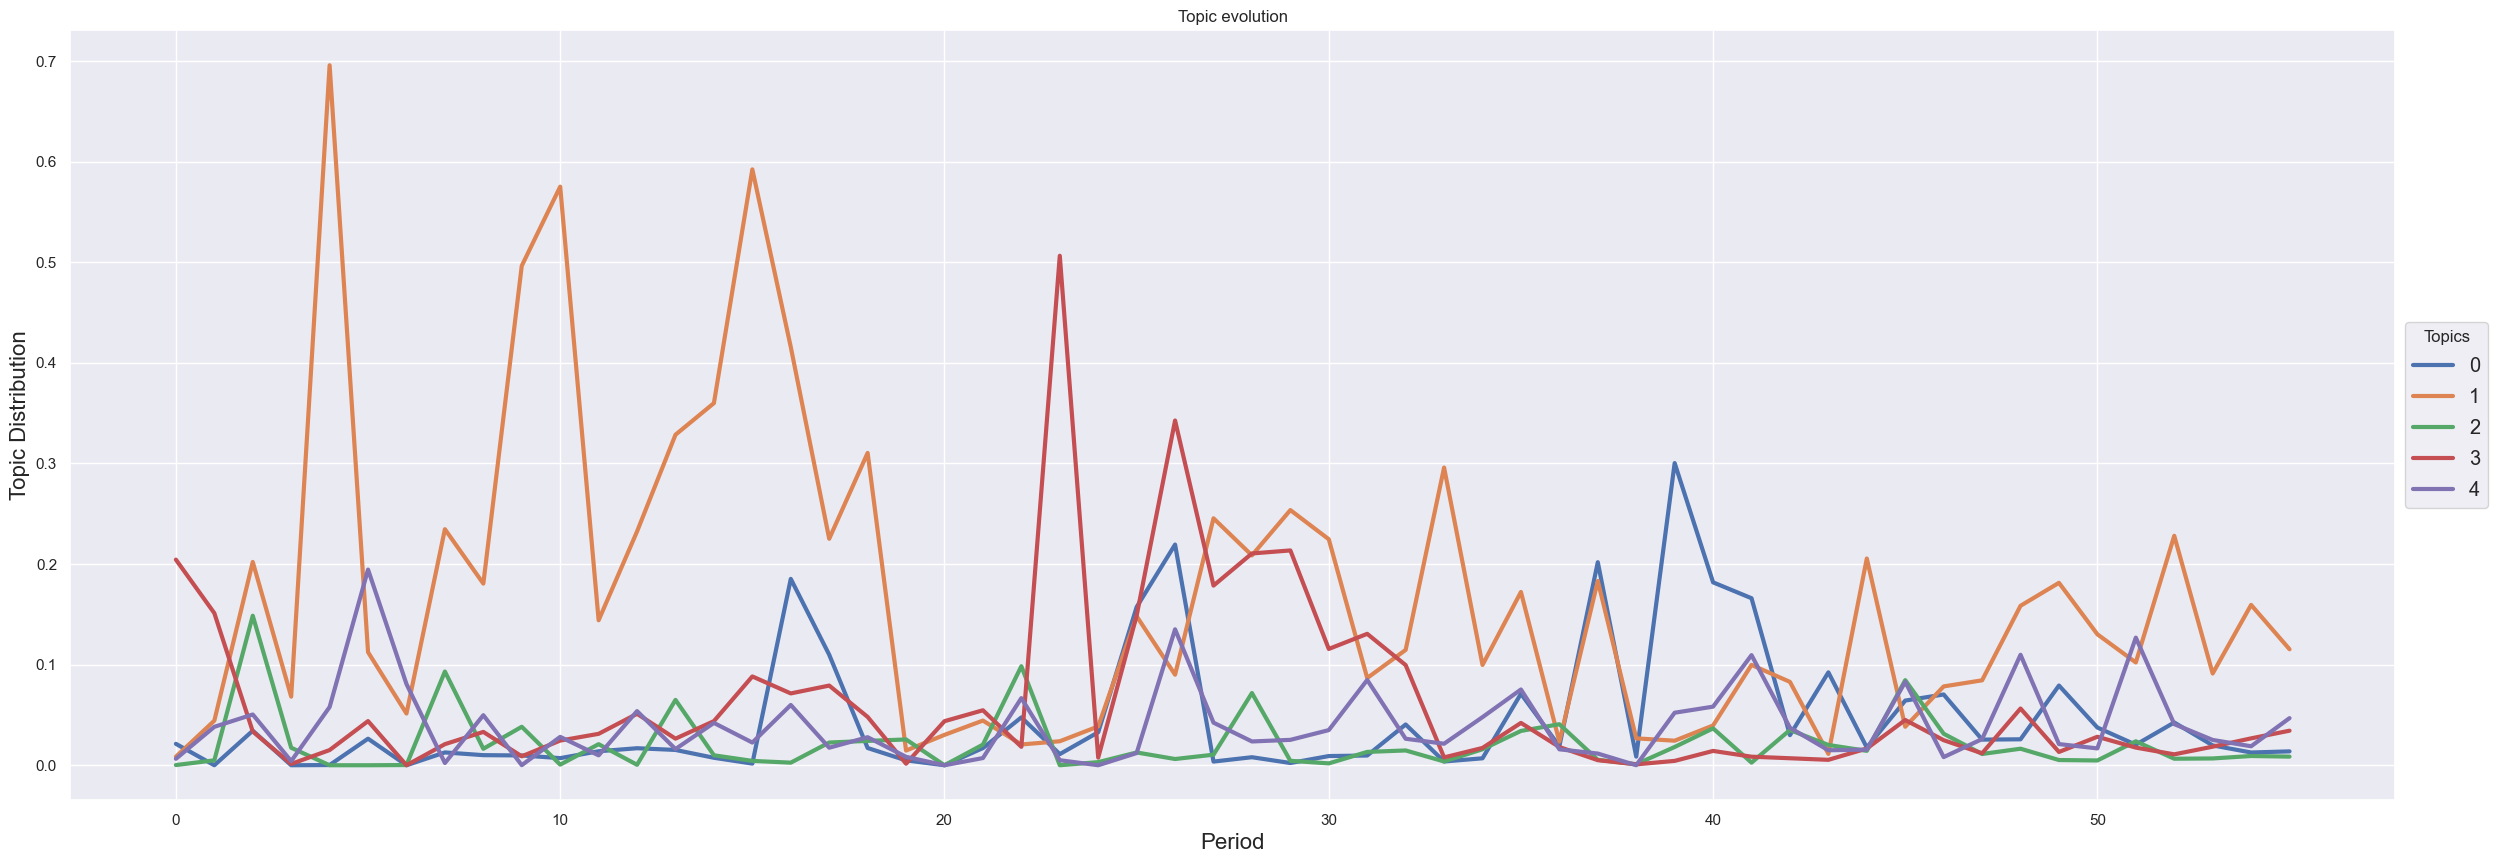

In [103]:
VisualizeTopics.visualize_topics(df)

In [ ]:
model.t

In [113]:
topics_dtm = model.dtm_coherence(time=2)

d:\BDBA 4th Semester\DTMModel\virtenv\lib\site-packages\gensim\models\wrappers\dtmmodel.py:498: UserWarning: The parameter `num_words` is deprecated, will be removed in 4.0.0, use `topn` instead.
  warnings.warn("The parameter `num_words` is deprecated, will be removed in 4.0.0, use `topn` instead.")


In [114]:
cm_DTM = CoherenceModel(topics=topics_dtm, texts=sentences, dictionary=corpus.dictionary, coherence='c_v')


In [115]:
cm_DTM.get_coherence()

0.5462406303470954

In [116]:
cm_w2v_DTM = CoherenceModel(topics=topics_dtm, texts=sentences, dictionary=corpus.dictionary, coherence='c_w2v')

In [117]:
cm_w2v_DTM.get_coherence()

0.62792724

In [118]:
u_mass_DTM = CoherenceModel(topics=topics_dtm, texts=sentences, dictionary=corpus.dictionary, coherence='u_mass')

In [119]:
u_mass_DTM.get_coherence()

-0.7093850399654019

In [121]:
uci_DTM = CoherenceModel(topics=topics_dtm, texts=sentences, dictionary=corpus.dictionary, coherence='c_uci')

In [122]:
uci_DTM.get_coherence()

0.37174302046984603

In [115]:
coherence = model.dtm_coherence(1)

In [116]:
coherence

[['system',
  'derogation',
  'electricity',
  'isolate',
  'nii',
  'capacity',
  'conventional',
  'yes',
  'niis',
  'grant',
  'renewable',
  'cost',
  'market',
  'generation',
  'application',
  'greek',
  'zone',
  'power',
  'provide',
  'infrastructure'],
 ['council',
  'energy',
  'decision',
  'adopt',
  'network',
  'point',
  'regard',
  'rule',
  'market',
  'parliament',
  'eea',
  'treaty',
  'code',
  'electricity',
  'agency',
  'board',
  'statistic',
  'regulatory',
  'authority',
  'relate'],
 ['space',
  'heater',
  'heat',
  'local',
  'temperature',
  'product',
  'output',
  'mean',
  'energy',
  'efficiency',
  'requirement',
  'heating',
  'solid',
  'value',
  'set',
  'control',
  'consumption',
  'express',
  'unit',
  'cool'],
 ['energy',
  'state',
  'measure',
  'national',
  'gas',
  'plan',
  'include',
  'point',
  'climate',
  'report',
  'supply',
  'refer',
  'level',
  'objective',
  'target',
  'integrate',
  'year',
  'assessment',
  'risk',
  

In [109]:
goodcm = CoherenceModel(model=model, corpus=corpus, coherence='u_mass')

ValueError: This topic model is not currently supported. Supported topic models should implement the `get_topics` method.

In [57]:
mod.print_all_topics(model, topicid = 10, time = 2020, num_words=10)

IndexError: index 10 is out of bounds for axis 0 with size 10

In [38]:
topics = model.show_topic(topicid=3, time=10, num_words=10)
topics

[(0.01837726670064774, 'energy'),
 (0.01810147720236548, 'shall'),
 (0.014156619104114095, 'power'),
 (0.011953125530965418, 'efficiency'),
 (0.011310098584306434, 'mode'),
 (0.01021825714537393, 'annex'),
 (0.008971706554374695, 'consumption'),
 (0.008728753621983224, 'product'),
 (0.00797887787445514, 'requirement'),
 (0.007937421377177028, 'test')]